<div align="center">
<h1>In The Name Of GOD</h1>
</div>

# HW1 - Data Mining - Notebook 2

## 1. Regression

### Importing Libraries

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Reading Data from the `GOOGL.csv` file

In [61]:
# Read the data
df = pd.read_csv('GOOGL.csv', sep=',', usecols=['Open'])

df.head()

,Open
0,211.47
1,222.17
2,223.22
3,228.66
4,233.44


### Taking the last 10 rows as test data and the rest as training data

In [62]:
train, test = df[:-10], df[-10:]

### Creating a linear regression model and fitting it to the training data and predicting the test data

#### defining required functions

In [107]:
def get_matrix(data_frame):
    data_size = data_frame.size
    mat = np.zeros((data_size,2))
    for i in range(data_size):
        mat[i,0] = i;
        mat[i,1] = data_frame.iloc[i,0];
    return mat

def find_less_min_square(A, B):
    return np.linalg.solve(np.matmul(A.T, A), np.matmul(A.T, B))

def calc_error(A,X,expected_y):
	return np.matmul(A,X) - expected_y

def calc_error_norm(A,X,expected_y):
	return np.linalg.norm(np.matmul(A,X) - expected_y)


def print_single_result(A, X, err, expected_y):
	print(f'Day {int(A[1])}')
	print(f'Calculated Value: {X[0]}')
	print(f'Actual Value: {expected_y[0]}')
	print(f'error: {err[0]}')
	print("---------------------------------------")

def plot_result(X, Y, size):
	days = [i for i in range(size)]
	plt.figure()
	plt.plot(days, Y, 'ro', label='Actual Value', markersize=1, linewidth=0.1, linestyle='solid', alpha=0.8)
	plt.plot(days, X, 'b', label='Calculated Value', markersize=6, linewidth=2, linestyle='solid')
	plt.show()

def show_result(A,X,Y,err,size):
	for i in range (size-10,size):
		print_single_result(A[i],X[i],err[i],Y[i])
	print("---------------------------------------")
	plot_result(X, Y, size)

In [108]:
matrix = get_matrix(df)
y_matrix = matrix[:df.size,1].reshape(-1,1)

### Calculating the Linear Solution

In [109]:
linear_x_matrix = np.hstack((np.ones((df.size,1)), matrix[:df.size,0].reshape(-1,1)));
linear_solution = find_less_min_square(linear_x_matrix[:df.size-10], y_matrix[:df.size-10])
linear_err = calc_error(linear_x_matrix, linear_solution, y_matrix)
linear_estimated_values = np.matmul(linear_x_matrix, linear_solution)
norm_linear_err = calc_error_norm(linear_x_matrix, linear_solution, y_matrix)

Day 3009
Calculated Value: 790.6169160846346
Actual Value: 1063.78
error: -273.1630839153654
---------------------------------------
Day 3010
Calculated Value: 790.8591419254949
Actual Value: 1076.45
error: -285.59085807450515
---------------------------------------
Day 3011
Calculated Value: 791.1013677663552
Actual Value: 1083.02
error: -291.91863223364476
---------------------------------------
Day 3012
Calculated Value: 791.3435936072154
Actual Value: 1080.92
error: -289.57640639278463
---------------------------------------
Day 3013
Calculated Value: 791.5858194480758
Actual Value: 1075.39
error: -283.80418055192433
---------------------------------------
Day 3014
Calculated Value: 791.8280452889361
Actual Value: 1070.0
error: -278.1719547110639
---------------------------------------
Day 3015
Calculated Value: 792.0702711297963
Actual Value: 1068.64
error: -276.5697288702038
---------------------------------------
Day 3016
Calculated Value: 792.3124969706566
Actual Value: 1066.6


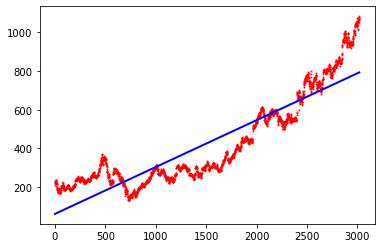

In [110]:
show_result(linear_x_matrix, linear_estimated_values, y_matrix, linear_err, df.size)

### Calculating the Polynomial Solution

In [111]:
polynomial_x_matrix = np.hstack((np.ones((data_size,1)), matrix[:data_size,0].reshape(-1,1),matrix[:data_size,0].reshape(-1,1)**2));
polynomial_solution = find_less_min_square(polynomial_x_matrix[:data_size-10], y_matrix[:data_size-10])
polynomial_err = calc_error(polynomial_x_matrix, polynomial_solution, y_matrix)
polynomial_estimated_values = np.matmul(polynomial_x_matrix, polynomial_solution)
norm_polynomial_err = calc_error_norm(polynomial_x_matrix, polynomial_solution, y_matrix)

Day 3009
Calculated Value: 993.8680182228164
Actual Value: 1063.78
error: -69.91198177718354
---------------------------------------
Day 3010
Calculated Value: 994.5153957622911
Actual Value: 1076.45
error: -81.93460423770898
---------------------------------------
Day 3011
Calculated Value: 995.1630424161453
Actual Value: 1083.02
error: -87.85695758385464
---------------------------------------
Day 3012
Calculated Value: 995.8109581843793
Actual Value: 1080.92
error: -85.1090418156208
---------------------------------------
Day 3013
Calculated Value: 996.459143066993
Actual Value: 1075.39
error: -78.93085693300714
---------------------------------------
Day 3014
Calculated Value: 997.1075970639863
Actual Value: 1070.0
error: -72.8924029360137
---------------------------------------
Day 3015
Calculated Value: 997.7563201753593
Actual Value: 1068.64
error: -70.88367982464081
---------------------------------------
Day 3016
Calculated Value: 998.405312401112
Actual Value: 1066.6
error: -

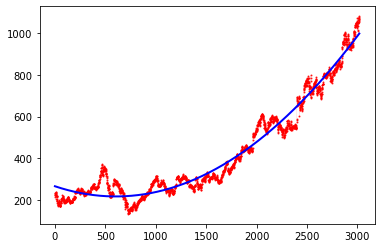

In [112]:
show_result(polynomial_x_matrix, polynomial_estimated_values, y_matrix, polynomial_err, data_size)

In [98]:
print(f'Norm of Linear model error: {norm_linear_err}')
print(f'Norm of Polynomial model error: {norm_polynomial_err}')

print(f'Total linear error: {np.sum(np.abs(linear_err))}')
print(f'Total polynomial error: {np.sum(np.abs(polynomial_err))}')

Norm of Linear model error: 5655.07796892809
Norm of Polynomial model error: 2539.0369706384554
Total linear error: 269631.13335642894
Total polynomial error: 112678.33208404752
